<a href="https://colab.research.google.com/github/jfsalzmann/gasprices/blob/main/final_sarimax_long.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [4]:
# Import some libraries that we will use
!pip install pmdarima 

import pandas as pd
import matplotlib.pylab as plt
from pmdarima import auto_arima 


# Then read the file as a csv

df = pd.read_csv("https://raw.githubusercontent.com/jfsalzmann/gasprices/main/data-constr/actual_sarima.csv",
                 index_col = 'date',
                 parse_dates = True).asfreq('D')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
train_y = df.iloc[:-150,]
test_y = df.iloc[-150:,]
train_X = df.iloc[:-150,]
test_X = df.iloc[-150:,]

train_data = df.iloc[:-150,]
test_data = df.iloc[-150:,]



In [5]:
! pip install pmdarima
from pmdarima.arima import auto_arima



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(0.412535773437135, True)

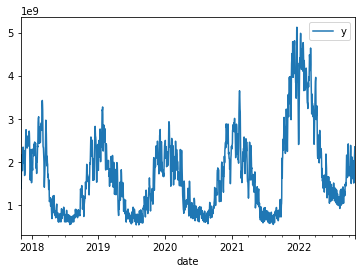

In [6]:
df.plot()

from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

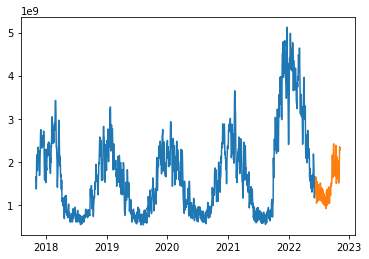

In [7]:
plt.plot(train_data)
plt.plot(test_data)

In [120]:
import pmdarima as pm

SARIMA_model = pm.auto_arima(train_data["y"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

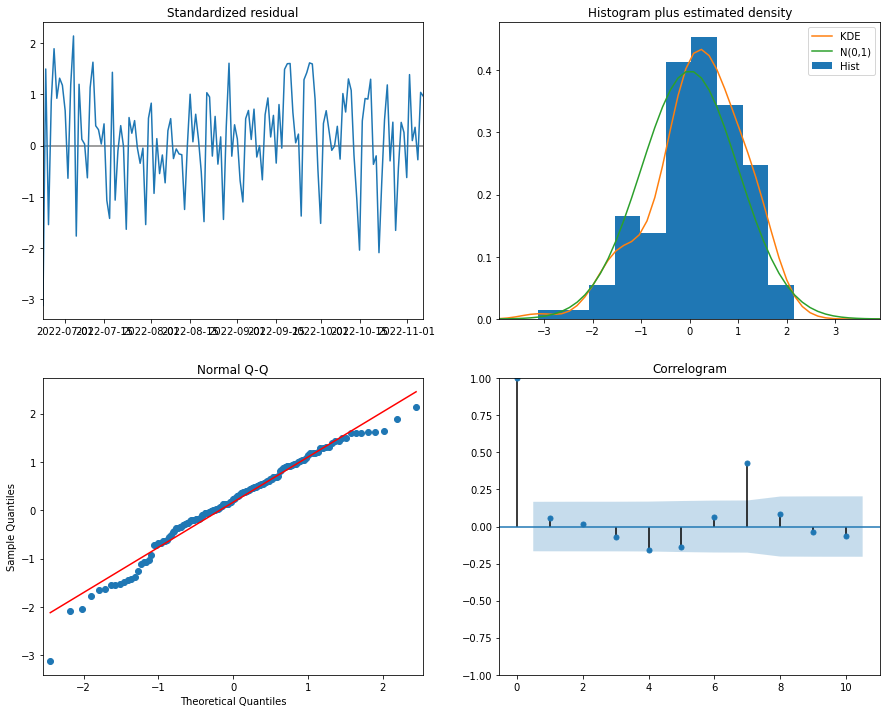

In [108]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [118]:
model = SARIMA_model


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  150
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2822.158
Date:                            Thu, 01 Dec 2022   AIC                           5656.316
Time:                                    01:27:50   BIC                           5673.880
Sample:                                06-11-2022   HQIC                          5663.454
                                     - 11-07-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0427      0.077     13.620      0.000       0.893       1.193
ar.L2         -0.3119      0.123     -2.543      0.011      -0.552      -0.072
ar.L3          0.0967      0.087      1.116      0.264      -0.073       0.267
ar.S.L12      -0.7596      0.095     -8.033      0.000      -0.945      -0.574
ar.S.L24      -0.3779      0.079     -4.806      0.000      -0.532      -0.224
sigma2      3.699e+16   6.36e-19   5.82e+34      0.000     3.7e+16     3.7e+16
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 8.67
Prob(Q):                              0.51   Prob(JB):                         0.01
Heteroskedasticity (H):               0.80   Skew:                            -0.58
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.57e+51. Standard errors may be unstable.
"""

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

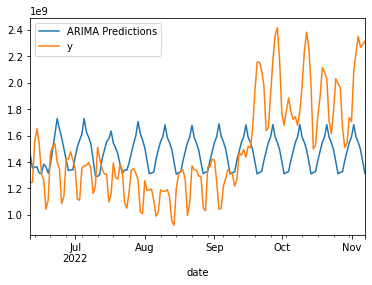

In [123]:


model_fit = SARIMA_model.fit(test_y)



start=len(train_X)
end=len(train_X)+len(test_y)-1
predictions=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test_y['y'].plot(legend=True)





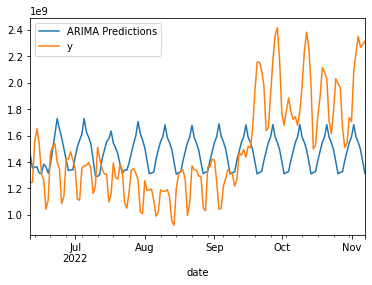

In [119]:
#	SARIMAX(3, 0, 0)x(2, 1, 0, 12)
model = SARIMAX(train_data, order=(3, 0, 0),
               seasonal_order=(2, 1, 0, 12))

model = model.fit()



start=len(train_data)
end=len(train_data)+len(test_data)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test_data['y'].plot(legend=True)

In [49]:


prediction = pd.DataFrame(model.predict(test_data), index =train_y.index)
prediction.columns = ['y']
prediction

TypeError: ignored

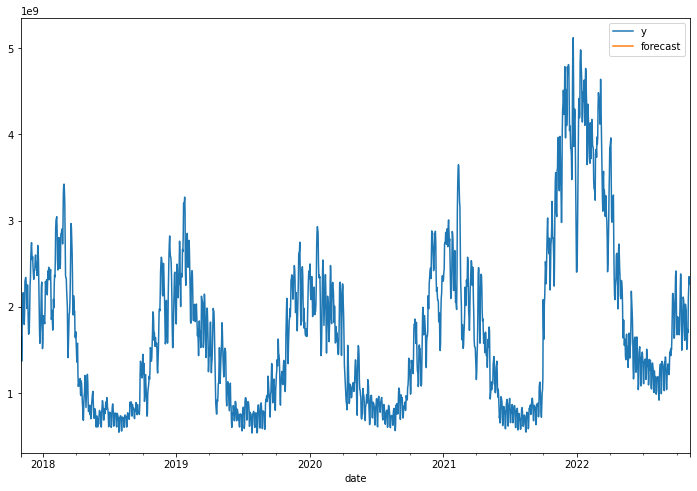

In [55]:
results=model.fit(test_y)

df['forecast']=results.predict(start=50,end=1500,dynamic=True)
df[['y','forecast']].plot(figsize=(12,8))

In [82]:
model_fit = SARIMA_model.fit(test_data)


pre = model.predict(test_y) 

start=len(train_X)
end=len(train_X)+len(test_y)-1
predictions=model.predict(test_y).rename('ARIMA Predictions')
pred.plot(legend=True)
test_y['y'].plot(legend=True)

predictions


NotImplementedError: ignored

In [83]:
results=model_fit

pre = results.predict(start=0,end=1500,dynamic=True)

